Feature Engineering


Outliers remover using percentile 

In [2]:
import pandas as pd 
df = pd.read_csv('heights.csv')

In [3]:
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [8]:
max_threshold= df['height'].quantile(0.95)

In [9]:
df[df['height']>max_threshold]

,name,height
9,imran,14.5


<Axes: ylabel='height'>

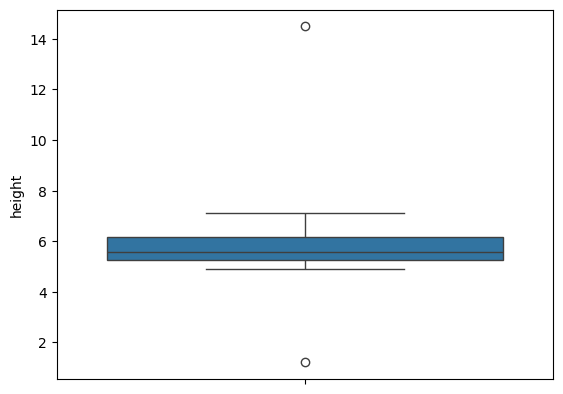

In [14]:
import seaborn as sns
sns.boxplot(df['height'])

In [11]:
min_threshold= df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [16]:
df1 =df[(df['height']<max_threshold) & (df['height']>min_threshold)]


<Axes: ylabel='height'>

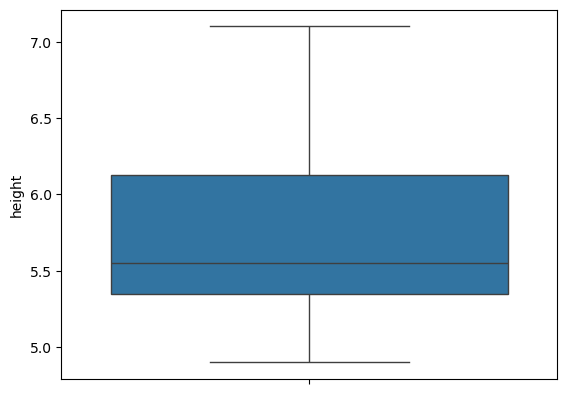

In [17]:
sns.boxplot(df1['height'])

In [61]:
df = pd.read_csv('bhp.csv')

In [62]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [63]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [64]:
df.shape

(13200, 7)

In [65]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


In [54]:
min_threshold, max_threshold = df.price_per_sqft.quantile([0.001, 0.8])
min_threshold,max_threshold

(1366.184, 8019.200000000001)

In [66]:
df[df['price_per_sqft']<min_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
665,Yelahanka,3 BHK,35000.0,3.0,130.0,3,371
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1867,other,3 Bedroom,52272.0,2.0,140.0,3,267
2392,other,4 Bedroom,2000.0,3.0,25.0,4,1250
3934,other,1 BHK,1500.0,1.0,19.5,1,1300
5343,other,9 BHK,42000.0,8.0,175.0,9,416
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7166,Yelahanka,1 Bedroom,26136.0,1.0,150.0,1,573
7862,JP Nagar,3 BHK,20000.0,3.0,175.0,3,875


In [67]:
df[df['price_per_sqft']>max_threshold]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.0,4,18181
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274
11,Whitefield,4 Bedroom,2785.0,5.0,295.0,4,10592
18,other,3 BHK,2770.0,4.0,290.0,3,10469
22,Thanisandra,4 Bedroom,2800.0,5.0,380.0,4,13571
...,...,...,...,...,...,...,...
13186,other,4 Bedroom,1200.0,5.0,325.0,4,27083
13188,Bannerghatta Road,3 BHK,1527.0,3.0,142.0,3,9299
13191,Ramamurthy Nagar,7 Bedroom,1500.0,9.0,250.0,7,16666
13196,other,4 BHK,3600.0,5.0,400.0,4,11111


In [68]:
df2 = df[(df['price_per_sqft']<max_threshold) & (df['price_per_sqft']>min_threshold)]

In [69]:
df2.shape

(10546, 7)

<Axes: ylabel='price_per_sqft'>

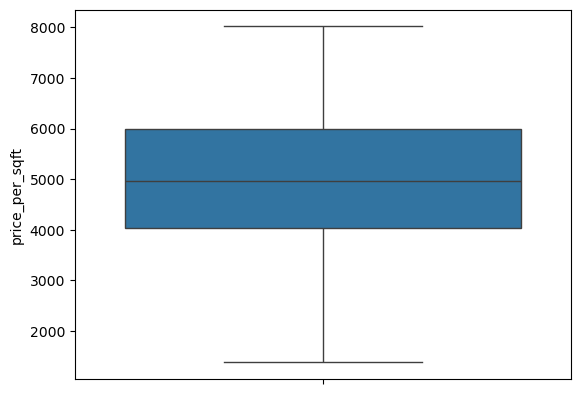

In [70]:
sns.boxplot(df2['price_per_sqft'])

Outlier removing using Z_Score   ,   Standard Daviation

In [71]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [72]:
df = pd.read_csv('weight-height.csv')

In [73]:
df.shape

(10000, 3)

In [75]:
df.sample(5)

,Gender,Height,Weight
4861,Male,72.725807,225.984684
5724,Female,64.132596,150.518295
8523,Female,65.036990,147.870357
8801,Female,61.832735,128.270858
5270,Female,61.104205,133.184100


In [83]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [89]:
df['Height'].min()

54.2631333250971

In [90]:
df['Height'].max()

78.9987423463896

In [91]:
df['Height'].std()

3.8475281207732324

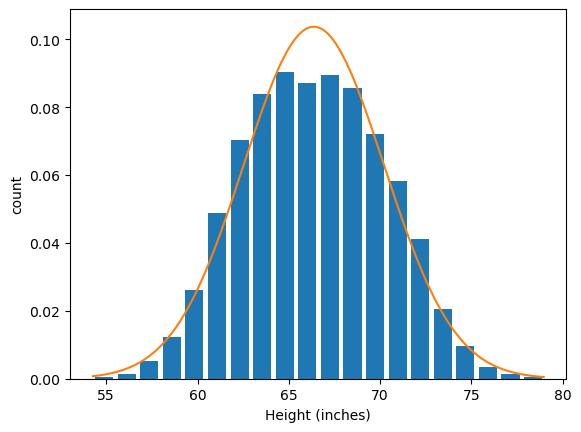

In [112]:
from scipy.stats import norm
# histo gram for heights 
plt.hist(df['Height'], bins = 20, rwidth=0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('count')

# adding lines for bell curve
rng = np.arange(df['Height'].min(), df['Height'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))
plt.show()

outlier removing using standard deviation

In [94]:
# outlier removal using 3 standard deviation 
upper_limit = df['Height'].mean()+ 3*df['Height'].std()
upper_limit

77.91014411714094

In [95]:
lower_limit = df['Height'].mean()- 3*df['Height'].std()
lower_limit

54.82497539250154

In [96]:
df[(df['Height']>upper_limit)  |  (df['Height']<lower_limit)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
9285,Female,54.263133,64.700127


In [97]:
df1 = df[(df['Height']<upper_limit)  &  (df['Height']>lower_limit)]

In [98]:
df1

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [100]:
# check how many rows are remove as an outlier
df.shape[0]-df1.shape[0]

7

REmoving outliers using Z_score
formula = z= (X-mean)/std

In [101]:
df['z_score'] = (df['Height']-df['Height'].mean())/df['Height'].std()

In [102]:
df.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [108]:
df[df['z_score']<-3]

,Gender,Height,Weight,z_score
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [107]:
df[df['z_score']>3]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854


In [109]:
df[(df['z_score']>3) | (df['z_score']<-3) ]

,Gender,Height,Weight,z_score
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [110]:
df3 = df[(df['z_score']<3) & (df['z_score']>-3) ]

In [111]:
df3.head()

,Gender,Height,Weight,z_score
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


Outlier removing using IQR 

In [113]:
df = pd.read_csv('heights.csv')
df

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
9,imran,14.5


In [114]:
df.describe()

,height
count,14.000000
mean,6.050000
std,2.779804
min,1.200000
25%,5.250000
50%,5.550000
75%,6.175000
max,14.500000


In [115]:
Q1 = df.height.quantile(0.25)
Q3 = df.height.quantile(0.75)
IQR = Q3-Q1

In [116]:
upper_limit = Q3+1.5*IQR
lower_limit = Q1-1.5*IQR
upper_limit,lower_limit

(7.5625, 3.8625000000000003)

In [119]:
df[(df.height>upper_limit) & (df.height<lower_limit)]

,name,height


In [ ]:
df1 = df[(df.height<upper_limit) & (df.height>lower_limit)]

In [118]:
df1

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


In [123]:
df = pd.read_csv('weight-height.csv')
df.shape

(10000, 3)

In [125]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


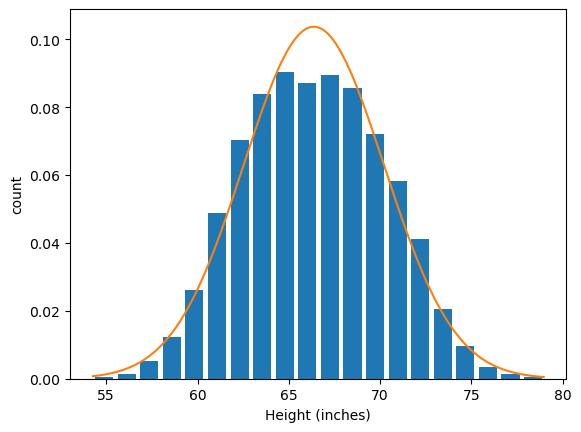

In [126]:
# histo gram for heights 
plt.hist(df['Height'], bins = 20, rwidth=0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('count')

# adding lines for bell curve
rng = np.arange(df['Height'].min(), df['Height'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))
plt.show()

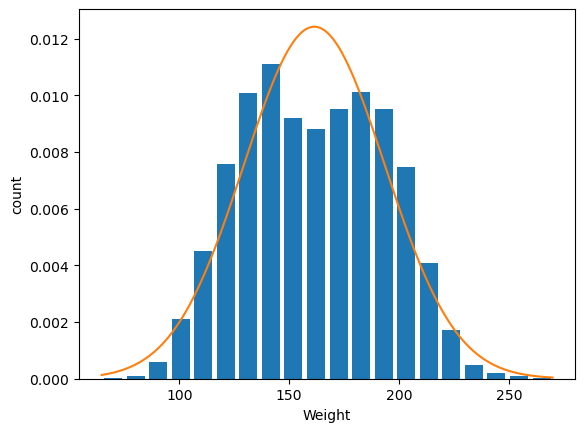

In [130]:
# histo gram for heights 
plt.hist(df['Weight'], bins = 20, rwidth=0.8, density = True)
plt.xlabel('Weight')
plt.ylabel('count')

# adding lines for bell curve
rng = np.arange(df['Weight'].min(), df['Weight'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df['Weight'].mean(), df['Weight'].std()))
plt.show()

In [ ]:
Q1_h = df.Height.quantile(0.25)
Q3_h = df.Height.quantile(0.75)
IQR_h = Q3_h - Q1_h

In [133]:
upper_limit_H = Q3_h +1.5*IQR_h
lower_limit_H = Q1_h - 1.5*IQR_h

In [140]:
df[(df.Height >upper_limit_H) | (df.Height <lower_limit_H)]

,Gender,Height,Weight
994,Male,78.095867,255.690835
1317,Male,78.462053,227.342565
2014,Male,78.998742,269.989699
3285,Male,78.528210,253.889004
3757,Male,78.621374,245.733783
6624,Female,54.616858,71.393749
7294,Female,54.873728,78.606670
9285,Female,54.263133,64.700127


In [137]:
df1 = df[(df.Height <upper_limit_H) & (df.Height >lower_limit_H)]

In [138]:
df1.shape

(9992, 3)

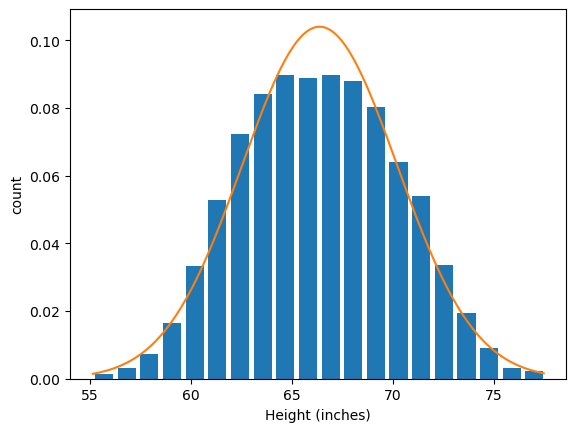

In [139]:
# histo gram for heights 
plt.hist(df1['Height'], bins = 20, rwidth=0.8, density = True)
plt.xlabel('Height (inches)')
plt.ylabel('count')

# adding lines for bell curve
rng = np.arange(df1['Height'].min(), df1['Height'].max(), 0.1 )
plt.plot(rng, norm.pdf(rng, df1['Height'].mean(), df1['Height'].std()))
plt.show()